In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("housing.csv")   # save your data as housing.csv

print(df.head())
print(df.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [3]:
binary_cols = [
    'mainroad','guestroom','basement',
    'hotwaterheating','airconditioning','prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes':1,'no':0})

In [4]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

In [5]:
X = df.drop('price', axis=1)   
y = df['price']   

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (436, 13)
Test shape: (109, 13)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Coefficients:")
print(pd.Series(model.coef_, index=X.columns))


Model Coefficients:
area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
mainroad                           3.679199e+05
guestroom                          2.316100e+05
basement                           3.902512e+05
hotwaterheating                    6.846499e+05
airconditioning                    7.914267e+05
parking                            2.248419e+05
prefarea                           6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


In [8]:
y_pred = model.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


Evaluation Metrics:
MAE: 970043.4039201641
MSE: 1754318687330.664
R² Score: 0.6529242642153184


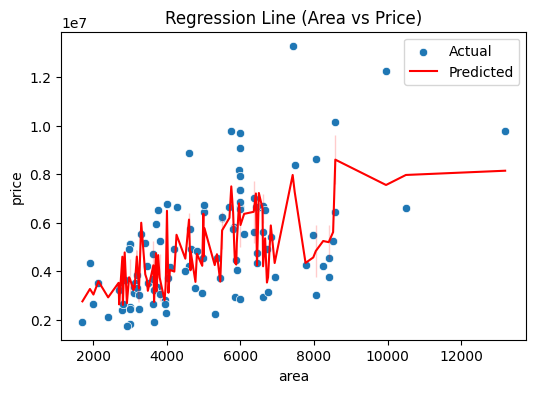

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['area'], y=y_test, label="Actual")
sns.lineplot(x=X_test['area'], y=y_pred, color='red', label="Predicted")
plt.title("Regression Line (Area vs Price)")
plt.show()